# <span style="color:blue">  Esercitazione 10</span>

## Esercizio 10.1-2

Questa esercitazione è pensata come evoluzione e continuazione dell'esercitazione precedente. Si tratta di risolvere il Traveling Salesman Problem (TSP) utilizzando un algoritmo genetico sfruttando il calcolo parallelo. Nell'esercitazione 9 viene spiegato come questo è stato implementato.

In aggiunta all'esercitazione precedente, qui si sfrutta il calcolo parallelo affinché ogni nodo esegua indipendentemente una propria ricerca genetica del miglior percorso. Le potenzialità del calcolo parallelo seguono dal fatto che dopo un certo numero di step genetici i vari nodi si scambiano in maniera casuale fra loro le loro migliori sequenze in maniera tale che questa informazione non resti confinata all'interno di ciascun nodo, ma sia diffusa anche agli altri. Questo aiuta ad accelerare il processo di convergenza dell'algoritmo.

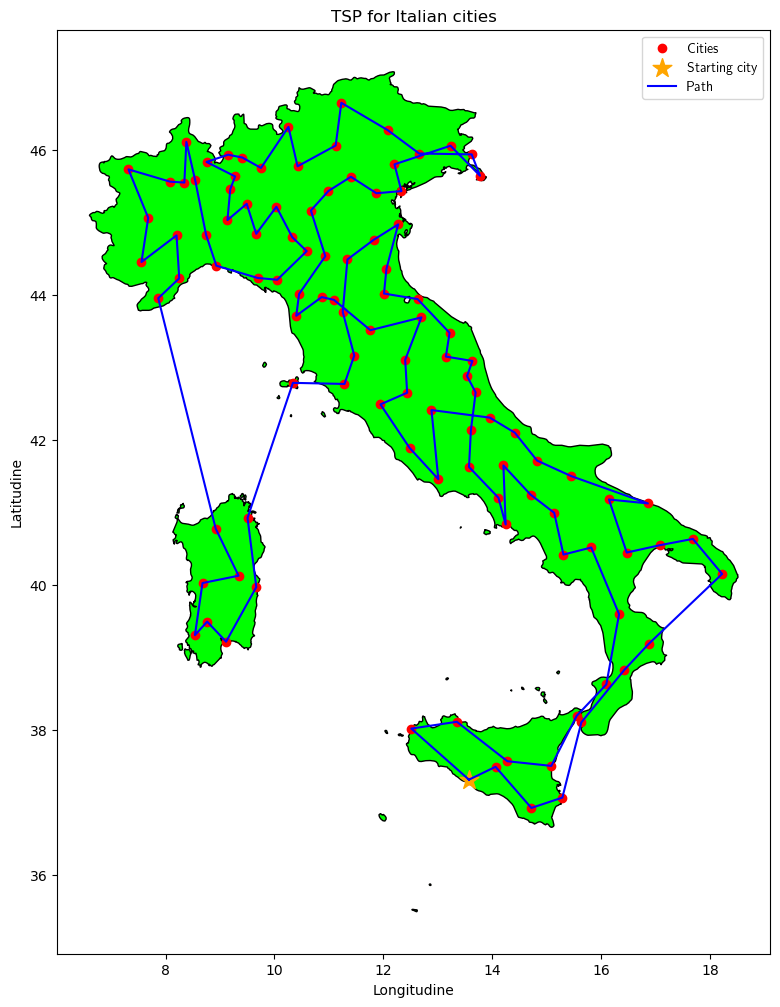

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Carica la cartina dell'Italia
world = gpd.read_file("./ITA_map/ne_10m_admin_0_countries_ita.shp")
italy = world[world['NAME'] == 'Italy']

# Carica il file delle città italiane
cities = np.loadtxt("cap_prov_ita.dat")
x_coord = cities[:,0]
y_coord = cities[:,1]

# Trova percorso ottimale
costfunction = np.loadtxt("costfunction_ita.out", skiprows=1)
sequences = np.loadtxt("sequences_ita.out", skiprows=1)
cost = costfunction[:,0]
indice_minimo = np.argmin(cost)
path = sequences[indice_minimo].astype(int)

# Ordine delle città data sequenza ottimale
x_ordine = [x_coord[i] for i in path]
y_ordine = [y_coord[i] for i in path]

# Chiusura percorso con città di partenza
x_ordine.append(x_ordine[0])
y_ordine.append(y_ordine[0])

# Traccia la cartina dell'Italia
fig, ax = plt.subplots(figsize=(12, 12))
plt.rcParams['text.usetex'] = True
italy.plot(ax=ax, color='lime', edgecolor='black')

# Sovrappone le coordinate delle città
ax.scatter(x_coord, y_coord, color='red', label='Cities') # Città
plt.scatter(x_coord[0], y_coord[0], c='orange', s=200, marker='*', label='Starting city') # Città di partenza
plt.plot(x_ordine, y_ordine, color='blue', label='Path') # Plot percorso

ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
plt.title('TSP for Italian cities')
plt.legend()
plt.show()

L'algoritmo genetico è stato applicato per determinare il più breve percorso che collega i 110 capolouoghi di provincia italiani. Si è scelta una popolazione di 2500 individui. Come parametri della simulazioni sono stati usati $p=10$ (esponente per selezione delle sequenze), $P_{cross}=0.8$ (probabilità di crossover) e $P_{mut}=0.01$ (probabilità di ogni singola mutazione). Sono stati utilizzati 11 nodi che si scambiano fra loro il 20% dei migliori individui ogni $10^2$ step genetici. In tutto, l'algoritmo genetico è chiamato $10^4$ volte.

Sospetto che la convergenza non sia ancora del tutto ottimale visto che si osservano chiaramente alcune intersezioni, indizio del fatto che probabilmente esiste una versione migliore del percorso.

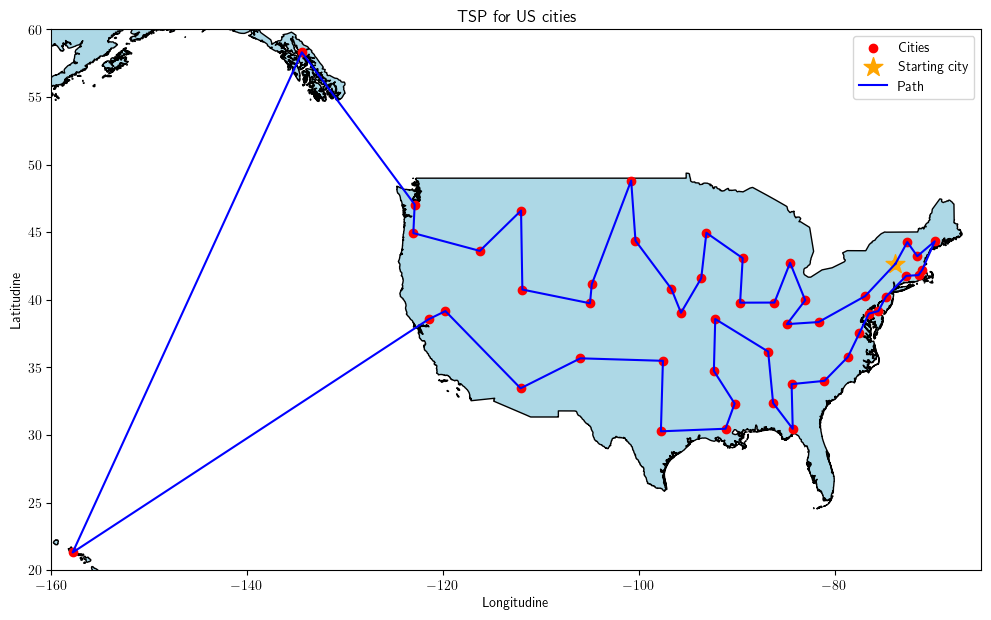

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Carica la cartina degli USA
world = gpd.read_file("./USA_map/ne_10m_admin_0_countries_usa.shp")
usa = world[world['NAME'] == 'United States']

# Carica il file delle città statunitensi
cities = np.loadtxt("cap_states_usa.dat")
x_coord = cities[:,0]
y_coord = cities[:,1]

costfunction = np.loadtxt("costfunction.out", skiprows=1)
cost = costfunction[:,0]
indice_minimo = np.argmin(cost)

# Estraggo ultima sequenza tra tutte
sequences = np.loadtxt("sequences.out", skiprows=1)
path = sequences[-1].astype(int)
path = sequences[indice_minimo].astype(int)

# Ordine delle città data sequenza ottimale
x_ordine = [x_coord[i] for i in path]
y_ordine = [y_coord[i] for i in path]

# Chiusura percorso con città di partenza
x_ordine.append(x_ordine[0])
y_ordine.append(y_ordine[0])

# Traccia la cartina degli USA
fig, ax = plt.subplots(figsize=(12, 12))
plt.rcParams['text.usetex'] = True
usa.plot(ax=ax, color='lightblue', edgecolor='black')

# Sovrappone le coordinate delle città
ax.scatter(x_coord, y_coord, color='red', label='Cities') # Città
plt.scatter(x_coord[0], y_coord[0], c='orange', s=200, marker='*', label='Starting city') # Città di partenza
plt.plot(x_ordine, y_ordine, color='blue', label='Path') # Plot percorso

ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
ax.set_xlim(-160,-65)
ax.set_ylim(20, 60)
plt.title('TSP for US cities')
plt.legend()
plt.show()

Quanto fatto per i capoluoghi italiani è stato applicato anche alle 50 capitali degli USA. I parametri utilizzati sono gli stessi del caso precedente, con la sola differenza che si è utilizzata una popolazione inferiore di 1500 sequenze. In questo caso, vista la minor difficoltà del problema, la convergenza raggiunta sembra essere quella ottimale.